In [1]:
# CNN >> 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [17]:
im=x_train[0]

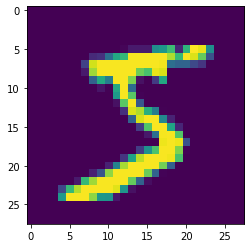

In [18]:
plt.imshow(im)

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_example=to_categorical(y_train)

In [25]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [27]:
y_cat_train=to_categorical(y_train,num_classes=10)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
x_train=x_train/255
x_test=x_test/255

In [31]:
x_train=x_train.reshape(60000,28,28,1)

In [34]:
x_test=x_test.reshape(10000,28,28,1)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [36]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))




In [37]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [38]:
from tensorflow.keras.callbacks import EarlyStopping


In [40]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [44]:
model.fit(x_train,y_cat_train,epochs=25,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 34s 565us/sample - loss: 0.1561 - accuracy: 0.9534 - val_loss: 0.0674 - val_accuracy: 0.9788
Epoch 2/25
60000/60000 [==============================] - 32s 525us/sample - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0573 - val_accuracy: 0.9815
Epoch 3/25
60000/60000 [==============================] - 34s 560us/sample - loss: 0.0333 - accuracy: 0.9895 - val_loss: 0.0490 - val_accuracy: 0.9839
Epoch 4/25
60000/60000 [==============================] - 35s 583us/sample - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0416 - val_accuracy: 0.9857
Epoch 5/25
60000/60000 [==============================] - 36s 606us/sample - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0465 - val_accuracy: 0.9854
Epoch 6/25
60000/60000 [==============================] - 37s 619us/sample - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0507 - val_accuracy: 0.9856


In [45]:
metrics=pd.DataFrame(model.history.history)

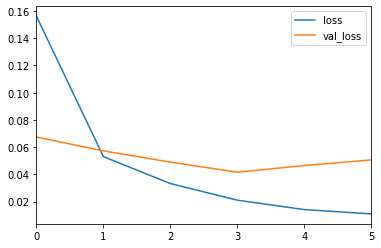

In [47]:
metrics[['loss','val_loss']].plot()

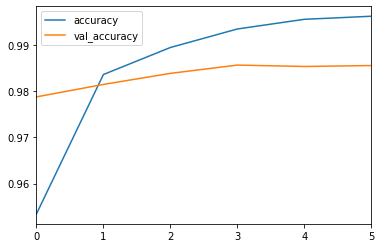

In [48]:
metrics[['accuracy','val_accuracy']].plot()

In [49]:
model.metrics_names

['loss', 'accuracy']

In [50]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.050653055945644156, 0.9856]

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
predictions=model.predict_classes(x_test)

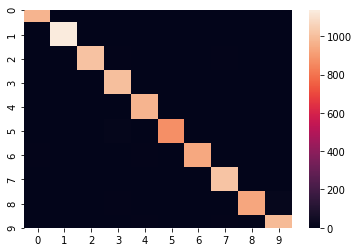

In [55]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions))